Loading preprocessed training data...
Loaded 6000 training images.
Loading preprocessed test data...
Loaded 1896 test images.


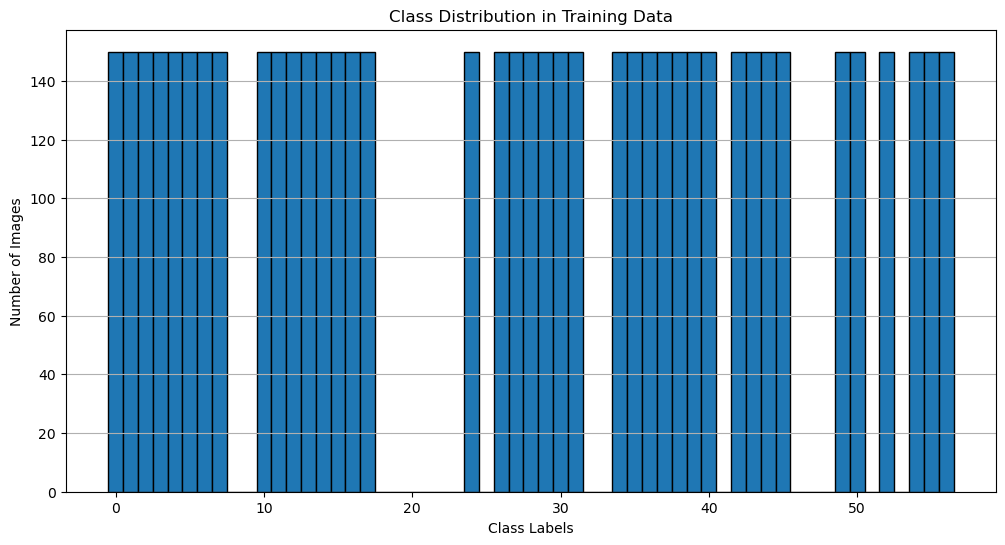

Training Random Forest Classifier...

Evaluation Metrics:
Training Accuracy: 1.00
Test Accuracy: 0.38
Precision: 0.47
Recall: 0.38
F1 Score: 0.40

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.57      0.40        14
           1       0.05      0.33      0.09        12
           2       0.43      0.20      0.27        60
           3       0.47      0.43      0.45        84
           4       0.38      0.21      0.27        58
           5       0.38      0.24      0.29        50
           6       0.03      0.07      0.04        30
           7       0.33      0.08      0.13        50
          10       0.93      0.87      0.90        60
          11       0.90      0.55      0.69       130
          12       0.83      0.91      0.87        22
          13       0.38      0.30      0.34        92
          14       0.00      0.00      0.00        12
          15       0.09      0.22      0.13        36
          16       

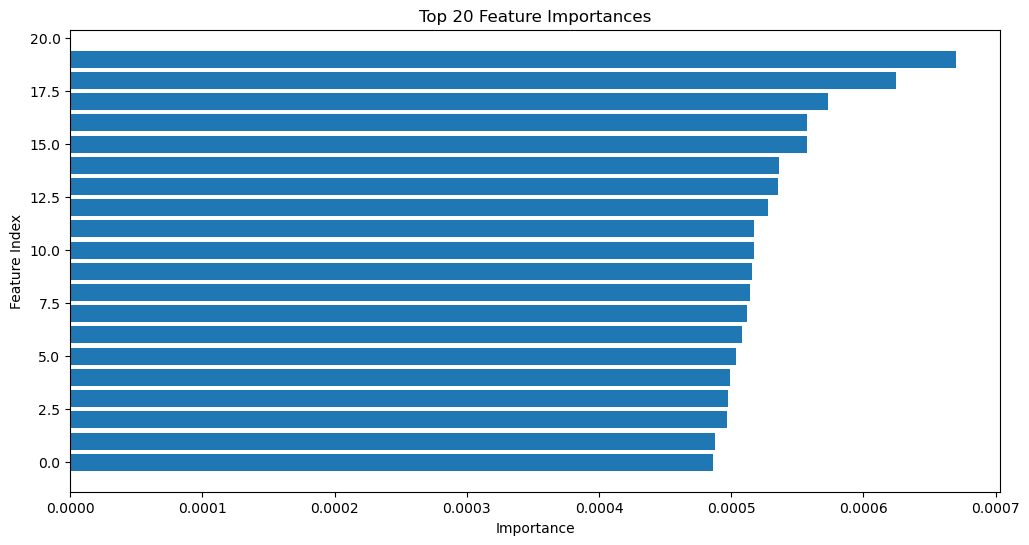

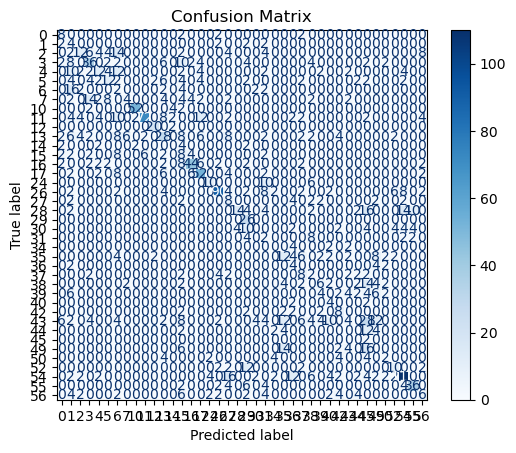

In [ ]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Establishing the training and testing directories
PREPROCESSED_TRAIN_DIR = "./data/preprocessed_data/traffic/trainNew/"
PREPROCESSED_TEST_DIR = "./data/preprocessed_data/traffic/testNew/"
image_size = (100, 100)

# Loading training data
print("Loading preprocessed training data...")
X_train = []
Y_train = []

for class_name in os.listdir(PREPROCESSED_TRAIN_DIR):
    class_dir = os.path.join(PREPROCESSED_TRAIN_DIR, class_name)
    if not os.path.isdir(class_dir):
        continue

    try:
        label = int(class_name)
    except ValueError:
        print(f"Skipping invalid directory name: {class_name}")
        continue

    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            X_train.append(img.flatten())
            Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(f"Loaded {X_train.shape[0]} training images.")

# Loading test data
print("Loading preprocessed test data...")
X_test = []
Y_test = []

for img_name in os.listdir(PREPROCESSED_TEST_DIR):
    img_path = os.path.join(PREPROCESSED_TEST_DIR, img_name)
    try:
        label = int(img_name.split("_")[1])
    except (ValueError, IndexError):
        print(f"Skipping invalid test filename: {img_name}")
        continue

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        X_test.append(img.flatten())
        Y_test.append(label)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(f"Loaded {X_test.shape[0]} test images.")

# Visualizing the class distribution in the training data to see if its balanced
plt.figure(figsize=(12, 6))
plt.hist(Y_train, bins=np.arange(min(Y_train), max(Y_train) + 2) - 0.5, edgecolor='black')
plt.title("Class Distribution in Training Data")
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.show()

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Random Forest Classifier
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)
rf_model.fit(X_train_scaled, Y_train)

# Evaluating the classifier on training data
Y_train_pred = rf_model.predict(X_train_scaled)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

# Evaluating the classifier on test data
Y_test_pred = rf_model.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
precision = precision_score(Y_test, Y_test_pred, average='weighted', zero_division=0)
recall = recall_score(Y_test, Y_test_pred, average='weighted', zero_division=0)
f1 = f1_score(Y_test, Y_test_pred, average='weighted', zero_division=0)

print("\nEvaluation Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Printing the classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_test_pred))

# Featuring Importances
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[-20:]  # Top 20 important features

# Shows the plot of the most important feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature Index")
plt.show()

# Confusion Matrix for the random forest
ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
